# Problem 16.3: Sugar Thermometer

##### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

### Set-up the model

Set the parameter values for the system

In [2]:
lambd = 1.
cpg = 1000.
mg = 0.025
dg = 3e-3
rhog = 2400.
mm = 3e-2
cpm = 140.
A = 2e-3
Ts = 164.
Tw = 20.
Tb = 20.
N = 5

Calculate derived quantities:

In [3]:
a = lambd*N/(rhog*cpg*dg**2)
b = lambd*A*N/(mm*cpm*dg)/2

Set-up the State-Space Model

In [4]:
aa = np.array([[-3*a, a, 0., 0., 0., 0.],
               [a, -2*a, a, 0., 0., 0.],
               [0., a, -2*a, a, 0., 0.],
               [0., 0., a, -2*a, a, 0.],
               [0., 0., 0., a, -3*a, 2*a],
               [0., 0., 0., 0., b, -b]])
bb = np.array([[2*a],[0.], [0.], [0.], [0.],[0.]])
cc = np.eye(N+1)
dd = np.zeros([N+1,1])

In [5]:
ss1 = sig.StateSpace(aa,bb,cc,dd) 

In [6]:
T0 = np.array([Tb, Tb, Tb, Tb, Tb, Tb])

In [7]:
t1 = np.linspace(0., 250., num=200)
u1 = Ts*np.ones_like(t1)
tout1, y1, x1 = sig.lsim(ss1, u1, t1, X0=T0)

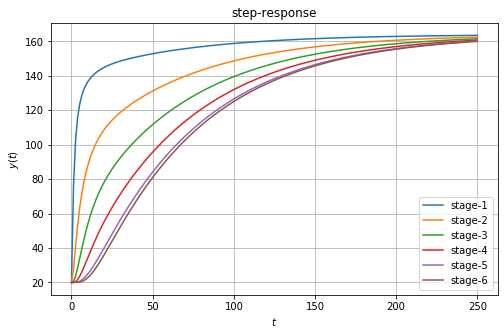

In [8]:
plt.figure(figsize=(8,5))
for n in range(N+1): 
    plt.plot(t1, y1[:,n],label="stage-{0}".format(n+1))
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.legend()
plt.title('step-response')
plt.grid(True)
plt.show()

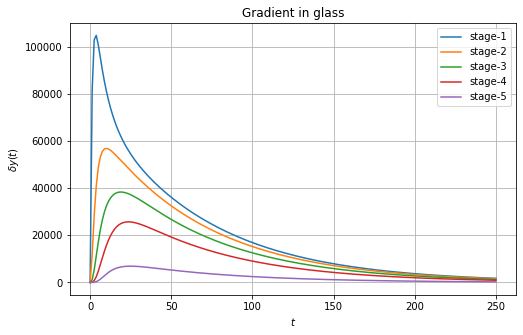

In [9]:
gg = np.zeros([200,N])
for n in range(N):
    gg[:,n] = (y1[:,n]-y1[:,n+1])/(dg/N)
plt.figure(figsize=(8,5))
for n in range(N): 
    plt.plot(t1, gg[:,n],label="stage-{0}".format(n+1))
plt.xlabel (r'$t$')
plt.ylabel (r'$\delta y(t)$')
plt.legend()
plt.title('Gradient in glass')
plt.grid(True)
plt.show()